In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

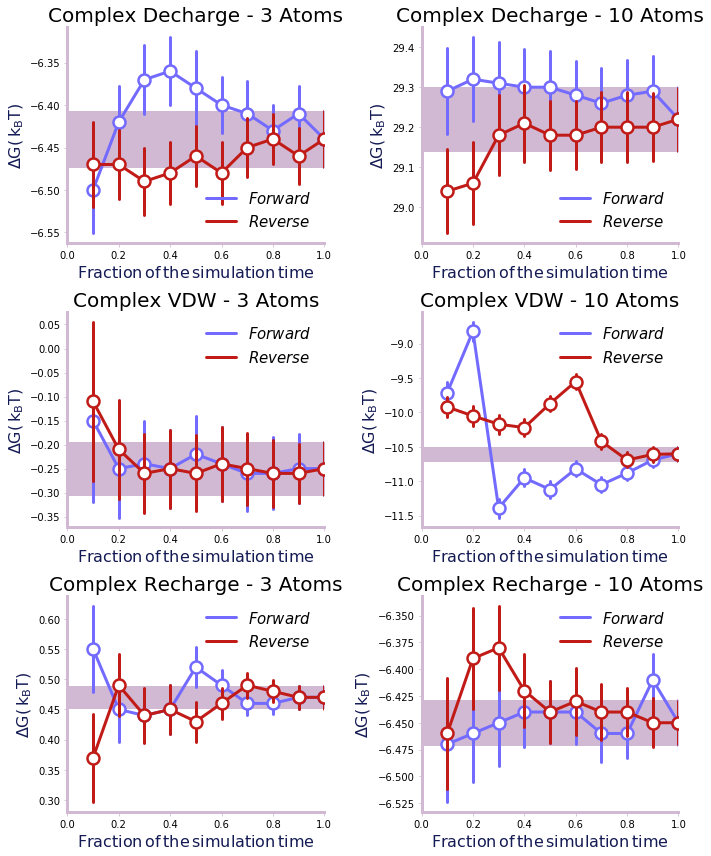

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
for j, atoms in enumerate([3, 10]):
    for i, phase in enumerate(["Complex Decharge", "Complex VDW", "Complex Recharge"]):
        plt.setp(ax[i][j].spines['bottom'], color='#D2B9D3', lw=3, zorder=-2)
        plt.setp(ax[i][j].spines['left'], color='#D2B9D3', lw=3, zorder=-2)
        for dire in ['top', 'right']:
            ax[i][j].spines[dire].set_color('none')
        ax[i][j].xaxis.set_ticks_position('bottom')
        ax[i][j].yaxis.set_ticks_position('left')

        newdf = df[(df.atoms == atoms)&(df.phase == phase)]
        dG = newdf.loc[(newdf.time == 1.0)&(newdf.direction == "forward"), "dG"]
        std = newdf.loc[(newdf.time == 1.0)&(newdf.direction == "forward"), "std"]
        line0 = ax[i][j].fill_between([0, 1], dG-std, dG+std, color='#D2B9D3', zorder=-5)
        forward_newdf = newdf[newdf.direction == "forward"]
        for ii, row in forward_newdf.iterrows():
            line1 = ax[i][j].plot([row['time']]*2, [row['dG'] - row['std'], row['dG'] + row['std']], 
                                  color='#736AFF', ls='-', lw=3, solid_capstyle='round', zorder=1)

        line11 = ax[i][j].plot(forward_newdf['time'], forward_newdf['dG'], color='#736AFF', ls='-', lw=3, marker='o', mfc='w', mew=2.5, 
                          mec='#736AFF', ms=12, zorder=2)

        reverse_newdf = newdf[newdf.direction == "reverse"]
        for ii, row in reverse_newdf.iterrows():
            line2 = ax[i][j].plot([row['time']]*2, [row['dG'] - row['std'], row['dG'] + row['std']], color='#C11B17', ls='-', lw=3, solid_capstyle='round', zorder=3)
        line22 = ax[i][j].plot(reverse_newdf['time'], reverse_newdf['dG'], color='#C11B17', ls='-', lw=3, marker='o', mfc='w', mew=2.5, mec='#C11B17', ms=12, zorder=4)

        ax[i][j].set_xlim(0, 1)
        ax[i][j].set_title("%s - %s Atoms" % (phase, atoms), fontsize=20)

        ax[i][j].legend((line1[0], line2[0]), (r'$Forward$', r'$Reverse$'), frameon=False, fontsize=15)
        ax[i][j].set_xlabel(r'$\mathrm{Fraction\/of\/the\/simulation\/time}$', fontsize=16, color='#151B54')
        ax[i][j].set_ylabel(r'$\mathrm{\Delta G(\/k_BT)}$' , fontsize=16, color='#151B54')
        ax[i][j].tick_params(axis='x', color='#D2B9D3', labelsize=10)
        ax[i][j].tick_params(axis='y', color='#D2B9D3', labelsize=10)
        
fig.tight_layout()
fig.savefig("Figure.pdf")